## Heart Failure Supervised Learning Project
This notebook uses a Kaggle databases containing 299 patient observations. The dataset shows different medical indicators a binary classification based on weather a given patient died of heart disease or not. The notebook imports the data, uses correlation analysis to select features from the dataset, and implements several supervised learning methods. The notebook concludes by comparing the performance of these models.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
#source for data: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
heart_df = pd.read_csv('heart_failure_dataset.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


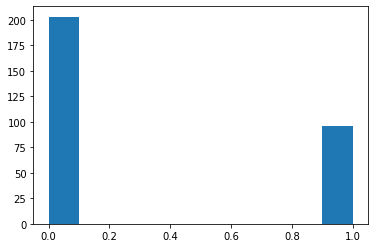

In [134]:
#dataset visualization
plt.hist(heart_df['DEATH_EVENT'])
plt.show()

In [65]:
#using correlations to choose features
heart_df.corr()['DEATH_EVENT']

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [66]:
heart_df.corr(method='spearman').corr()['DEATH_EVENT']

age                         0.450625
anaemia                     0.127182
creatinine_phosphokinase   -0.081070
diabetes                   -0.045697
ejection_fraction          -0.539440
high_blood_pressure         0.158568
platelets                  -0.152172
serum_creatinine            0.658027
serum_sodium               -0.497734
sex                         0.021932
smoking                    -0.042066
time                       -0.824916
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [67]:
#define features and train/test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
feats = ['age', 'anaemia', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'platelets', 'high_blood_pressure']
X_train, X_test, y_train, y_test = train_test_split(heart_df.loc[:, feats], heart_df.iloc[:, -1])
len(X_train), len(X_test)

(224, 75)

In [93]:
#dummy classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_train_acc, dummy_test_acc = accuracy_score(y_train, dummy.predict(X_train)), accuracy_score(y_test, dummy.predict(X_test))
dummy_train_auc, dummy_test_auc = roc_auc_score(y_train, dummy.predict(X_train)), roc_auc_score(y_test, dummy.predict(X_test))
print('Accuracy score, train: ', dummy_train_acc, ', test: ', dummy_test_acc)
print('\nAUC score, train: ', dummy_train_auc, ', test: ', dummy_test_auc)

Accuracy score, train:  0.5848214285714286 , test:  0.56

AUC score, train:  0.5174380551659654 , test:  0.5289351851851851


In [81]:
#k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
knn_train_acc, knn_test_acc = accuracy_score(y_train, knn.predict(X_train)), accuracy_score(y_test, knn.predict(X_test))
knn_train_auc, knn_test_auc = roc_auc_score(y_train, knn.predict(X_train)), roc_auc_score(y_test, knn.predict(X_test))
print('Accuracy score, train: ', knn_train_acc, ', test: ', knn_test_acc)
print('\nAUC score, train: ', knn_train_auc, ', test: ', knn_test_auc)

Accuracy score, train:  0.7321428571428571 , test:  0.64

AUC score, train:  0.5772791023842917 , test:  0.5243055555555556


In [80]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=4).fit(X_train, y_train)
logreg_train_acc, logreg_test_acc = accuracy_score(y_train, logreg.predict(X_train)), accuracy_score(y_test, logreg.predict(X_test))
logreg_train_auc, logreg_test_auc = roc_auc_score(y_train, logreg.predict(X_train)), roc_auc_score(y_test, logreg.predict(X_test))
print('Accuracy score, train: ', logreg_train_acc, ', test: ', logreg_test_acc)
print('\nAUC score, train: ', logreg_train_auc, ', test: ', logreg_test_auc)

Accuracy score, train:  0.8482142857142857 , test:  0.7866666666666666

AUC score, train:  0.7978494623655914 , test:  0.7280092592592593


In [92]:
#random forest
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=50, max_depth=10).fit(X_train, y_train)
randfor_train_acc, randfor_test_acc = accuracy_score(y_train, randfor.predict(X_train)), accuracy_score(y_test, randfor.predict(X_test))
randfor_train_auc, randfor_test_auc = roc_auc_score(y_train, randfor.predict(X_train)), roc_auc_score(y_test, randfor.predict(X_test))
print('Accuracy score, train: ', randfor_train_acc, ', test: ', randfor_test_acc)
print('\nAUC score, train: ', randfor_train_auc, ', test: ', randfor_test_auc)

Accuracy score, train:  0.9910714285714286 , test:  0.84

AUC score, train:  0.9855072463768115 , test:  0.7939814814814816


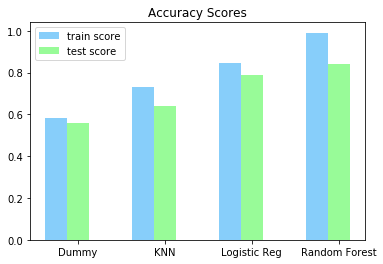

In [137]:
#visualization of accuracy performance
barwidth = 0.25
bars1 = [dummy_train_acc, knn_train_acc, logreg_train_acc, randfor_train_acc]
bars2 = [dummy_test_acc, knn_test_acc, logreg_test_acc, randfor_test_acc]
x1 = np.arange(len(bars1))
x2 = [i+barwidth for i in x1]
plt.bar(x1, bars1, color='lightskyblue', width=barwidth)
plt.bar(x2, bars2, color='palegreen', width=barwidth)
plt.xticks(x2, ['Dummy', 'KNN', 'Logistic Reg', 'Random Forest'])
plt.legend(['train score', 'test score'])
plt.title('Accuracy Scores')
plt.show()

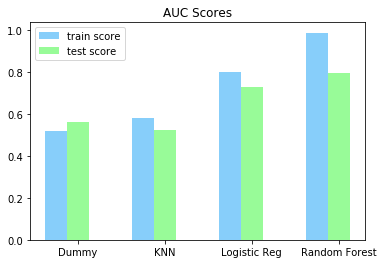

In [139]:
bars1 = [dummy_train_auc, knn_train_auc, logreg_train_auc, randfor_train_auc]
bars2 = [dummy_test_acc, knn_test_auc, logreg_test_auc, randfor_test_auc]
x1 = np.arange(len(bars1))
x2 = [i+barwidth for i in x1]
plt.bar(x1, bars1, color='lightskyblue', width=barwidth)
plt.bar(x2, bars2, color='palegreen', width=barwidth)
plt.xticks(x2, ['Dummy', 'KNN', 'Logistic Reg', 'Random Forest'])
plt.legend(['train score', 'test score'])
plt.title('AUC Scores')
plt.show()